In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import numpy as np 
import pandas as pd
import random
import cv2 as cv

In [3]:
import os
import glob
import random
import cv2 as cv
import numpy as np 
import pandas as pd
from PIL import Image
import tensorflow as tf
from imutils import paths
import matplotlib.pyplot as plt
from IPython.display import display
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Convolution2D
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Conv2D, SeparableConv2D, Activation
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 

Images converted to CLAHE format, and stored in Google Drive.

In [ ]:
#CLAHE CONVERTION
dis=1
hea=1
imagePaths = list(paths.list_images("/content/gdrive/MyDrive/MANGO"))
for imagePath in imagePaths:
  img = cv.imread(imagePath)
  label=imagePath.split(os.path.sep)[-2]
  bgr=cv.resize(img,(500,500))
  lab = cv.cvtColor(bgr, cv.COLOR_BGR2LAB)
  lab_planes = cv.split(lab)
  clahe = cv.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
  lab_planes[0] = clahe.apply(lab_planes[0])
  lab = cv.merge(lab_planes)
  bgr = cv.cvtColor(lab, cv.COLOR_LAB2BGR)
  if label=='Diseased':
    path='/content/gdrive/MyDrive/clahe/Diseased'
    conc=path+"/frame"+str(dis)+".jpg" 
    cv.imwrite(conc,bgr)
    dis=dis+1
  elif label=='Healthy':
    path='/content/gdrive/MyDrive/clahe/Healthy'
    conc=path+"/frame"+str(hea)+".jpg" 
    cv.imwrite(conc,bgr)
    hea=hea+1
  

Load images from Drive

In [4]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images("/content/gdrive/MyDrive/clahe"))
print(imagePaths)
data = []
labels = []

#loop over the image paths
for imagePath in imagePaths:
  label=imagePath.split(os.path.sep)[-2]
  image=load_img(imagePath,target_size=(224,224))
  image=img_to_array(image)
  image=preprocess_input(image)
  data.append(image)
  labels.append(label)

[INFO] loading images...
['/content/gdrive/MyDrive/clahe/Diseased/frame3.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame4.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame5.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame6.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame7.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame8.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame9.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame10.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame11.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame12.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame13.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame14.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame15.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame16.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame17.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame18.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame19.jpg', '/content/gdrive/MyDrive/clahe/Diseased/frame20.jpg', '/content

In [5]:
print(labels)

['Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Diseased', 'Di

In [6]:
#convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [7]:
print(labels.shape)

(435,)


In [8]:
#perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [9]:
#dataset split into 80% images for training and 20% images for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

In [10]:
print(testY.shape)

(87, 2)


In [11]:
#construct the training image generator for data augmentation as size of dataset is less than 500 images
aug = ImageDataGenerator(
	rotation_range=22,
	zoom_range=0.15,
	width_shift_range=0.3,
	height_shift_range=0.2,
	shear_range=5,
	horizontal_flip=True,
	fill_mode="nearest")

In [12]:
#load the ResNet50 network, with no head 
baseModel = ResNet50(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

In [13]:
#initialize the initial learning rate, number of epochs to train for,and batch size
INIT_LR =7e-3
EPOCHS = 20
BS = 32

In [14]:
#construct the head of the model that will be placed on top of the the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.3)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [15]:
#place the head FC model on top of the base model 
model = Model(inputs=baseModel.input, outputs=headModel)

In [16]:
#loop over all layers in the base model and freeze them so they will *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [17]:
#compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [18]:
print(type(trainX))

<class 'numpy.ndarray'>


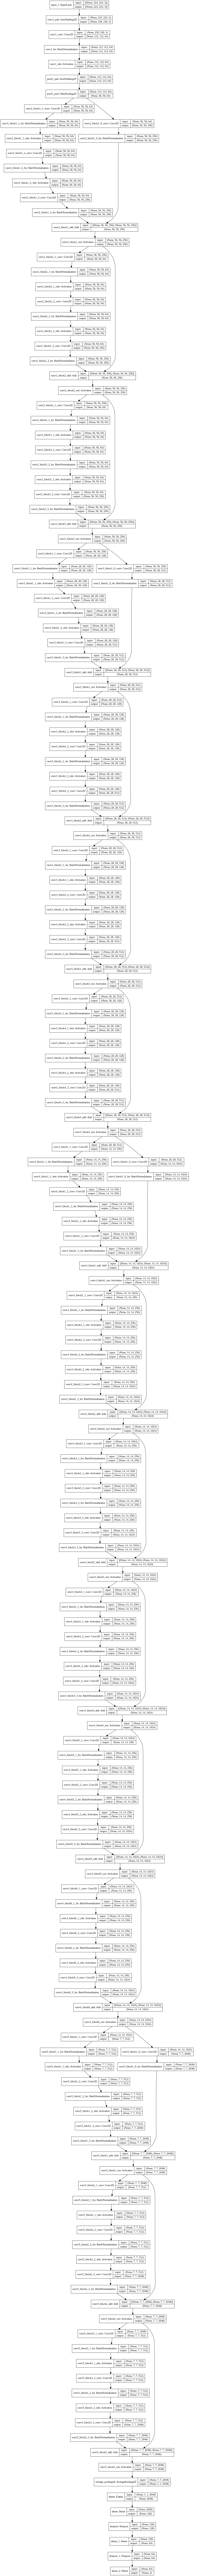

In [19]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
#train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/20
10/10 [==============================] - 12s 689ms/step - loss: 1.8135 - accuracy: 0.4968 - val_loss: 0.6472 - val_accuracy: 0.6552
Epoch 2/20
10/10 [==============================] - 4s 365ms/step - loss: 0.6496 - accuracy: 0.6646 - val_loss: 0.4571 - val_accuracy: 0.9080
Epoch 3/20
10/10 [==============================] - 4s 361ms/step - loss: 0.5233 - accuracy: 0.7437 - val_loss: 0.3131 - val_accuracy: 0.9540
Epoch 4/20
10/10 [==============================] - 4s 365ms/step - loss: 0.3760 - accuracy: 0.8323 - val_loss: 0.1968 - val_accuracy: 0.9655
Epoch 5/20
10/10 [==============================] - 4s 365ms/step - loss: 0.2830 - accuracy: 0.8576 - val_loss: 0.1891 - val_accuracy: 0.9080
Epoch 6/20
10/10 [==============================] - 4s 378ms/step - loss: 0.2105 - accuracy: 0.9114 - val_loss: 0.2229 - val_accuracy: 0.8966
Epoch 7/20
10/10 [==============================] - 4s 376ms/step - loss: 0.2139 - accuracy: 0.9019 - val_loss: 0.1071 - va

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [22]:
#make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

#for each image in the testing set we need to find the index of the label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

[INFO] evaluating network...


In [23]:
#show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1),predIdxs,target_names=lb.classes_))

              precision    recall  f1-score   support

    Diseased       0.98      0.98      0.98        53
     Healthy       0.97      0.97      0.97        34

    accuracy                           0.98        87
   macro avg       0.98      0.98      0.98        87
weighted avg       0.98      0.98      0.98        87



In [24]:
Accuracy = (accuracy_score(testY.argmax(axis=1),predIdxs)*100)
print('ACCURACY in Percentage:', round(Accuracy,2),'%')

ACCURACY in Percentage: 97.7 %


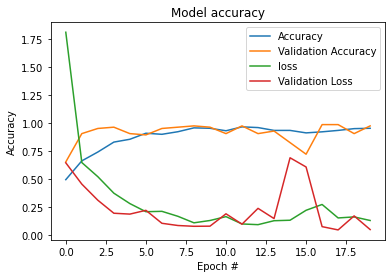

In [25]:
N = EPOCHS
plt.plot(H.history["accuracy"], label="train_acc")
plt.plot(H.history["val_accuracy"], label="val_acc")
plt.plot(H.history["loss"], label="train_loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch #")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

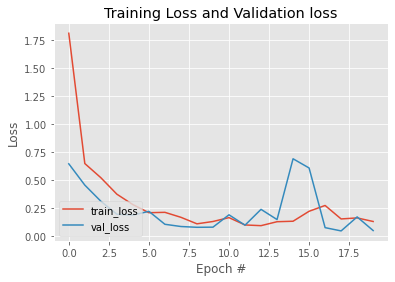

In [26]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

Text(0, 0.5, 'Accuracy')

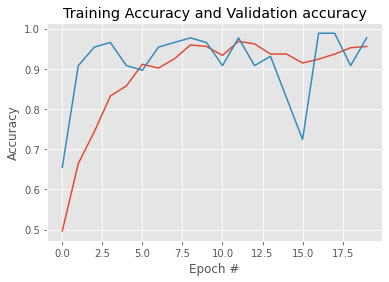

In [27]:
#plot the training and validation accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy and Validation accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")

#Feature Extraction using ResNet

In [43]:
from sklearn import svm
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [44]:
featureExtractor = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

In [45]:
features = featureExtractor.predict(data, batch_size=32)
features.shape

(435, 7, 7, 2048)

In [46]:
model=Sequential()
model.add(Flatten())
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

In [47]:
features = model.predict(features)
features.shape

(435, 100352)

In [48]:
y = np.argmax(labels, axis=1)
y.shape

(435,)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", y_test.shape)

Shape of X_train:  (348, 100352)
Shape of Y_train:  (348,)
Shape of X_test:  (87, 100352)
Shape of Y_test:  (87,)


KNN Classifier

In [51]:
KNNClf = KNeighborsClassifier()
KNNClf.fit(X_train, y_train)
predictKN = KNNClf.predict(X_test)
print(classification_report(y_test,predictKN))
Accuracy = (accuracy_score(y_test,predictKN)*100)
print('ACCURACY of KNN:', round(Accuracy,2),'%')
print("")
print(confusion_matrix(y_test,predictKN))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88        53
           1       0.86      0.71      0.77        34

    accuracy                           0.84        87
   macro avg       0.84      0.82      0.82        87
weighted avg       0.84      0.84      0.84        87

ACCURACY of KNN: 83.91 %

[[49  4]
 [10 24]]


Gaussian Naive Bayes Classifier

In [52]:
GNBClf = GaussianNB()
GNBClf.fit(X_train, y_train)
predictGNB = GNBClf.predict(X_test)
print(classification_report(y_test,predictGNB))
Accuracy = (accuracy_score(y_test,predictGNB)*100)
print('ACCURACY of Gaussian Naive Bayes:', round(Accuracy,2),'%')
print("")
print(confusion_matrix(y_test,predictGNB))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        53
           1       0.93      0.74      0.82        34

    accuracy                           0.87        87
   macro avg       0.89      0.85      0.86        87
weighted avg       0.88      0.87      0.87        87

ACCURACY of Gaussian Naive Bayes: 87.36 %

[[51  2]
 [ 9 25]]


Logistic Regression

In [53]:
LRClf = LogisticRegression(max_iter = 200000)
LRClf.fit(X_train, y_train)
predictLR = LRClf.predict(X_test)

print(classification_report(y_test,predictLR))
Accuracy = (accuracy_score(y_test,predictLR)*100)
print('ACCURACY of Logistic Regression:', round(Accuracy,2),'%')
print("")
print(confusion_matrix(y_test,predictLR))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.97      1.00      0.99        34

    accuracy                           0.99        87
   macro avg       0.99      0.99      0.99        87
weighted avg       0.99      0.99      0.99        87

ACCURACY of Logistic Regression: 98.85 %

[[52  1]
 [ 0 34]]


Decision Tree Classifier

In [54]:
DTClf = tree.DecisionTreeClassifier()
DTClf.fit(X_train, y_train)
predictDT = DTClf.predict(X_test)

print(classification_report(y_test,predictDT))
Accuracy = (accuracy_score(y_test,predictDT)*100)
print('ACCURACY of Decision Tree (CART):', round(Accuracy,2),'%')
print("")
print(confusion_matrix(y_test,predictDT))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        53
           1       0.97      0.82      0.89        34

    accuracy                           0.92        87
   macro avg       0.93      0.90      0.91        87
weighted avg       0.92      0.92      0.92        87

ACCURACY of Decision Tree (CART): 91.95 %

[[52  1]
 [ 6 28]]


[Text(418.5, 489.24, 'X[98413] <= 6.157\ngini = 0.476\nsamples = 348\nvalue = [212, 136]'),
 Text(167.4, 380.52000000000004, 'X[96380] <= 1.299\ngini = 0.088\nsamples = 130\nvalue = [6, 124]'),
 Text(83.7, 271.8, 'gini = 0.0\nsamples = 123\nvalue = [0, 123]'),
 Text(251.10000000000002, 271.8, 'X[33961] <= 1.103\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(167.4, 163.08000000000004, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(334.8, 163.08000000000004, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(669.6, 380.52000000000004, 'X[85790] <= 9.272\ngini = 0.104\nsamples = 218\nvalue = [206, 12]'),
 Text(585.9, 271.8, 'X[21383] <= 0.531\ngini = 0.046\nsamples = 211\nvalue = [206, 5]'),
 Text(502.20000000000005, 163.08000000000004, 'gini = 0.0\nsamples = 204\nvalue = [204, 0]'),
 Text(669.6, 163.08000000000004, 'X[69151] <= 0.648\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(585.9, 54.360000000000014, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(753.3000000000001, 5

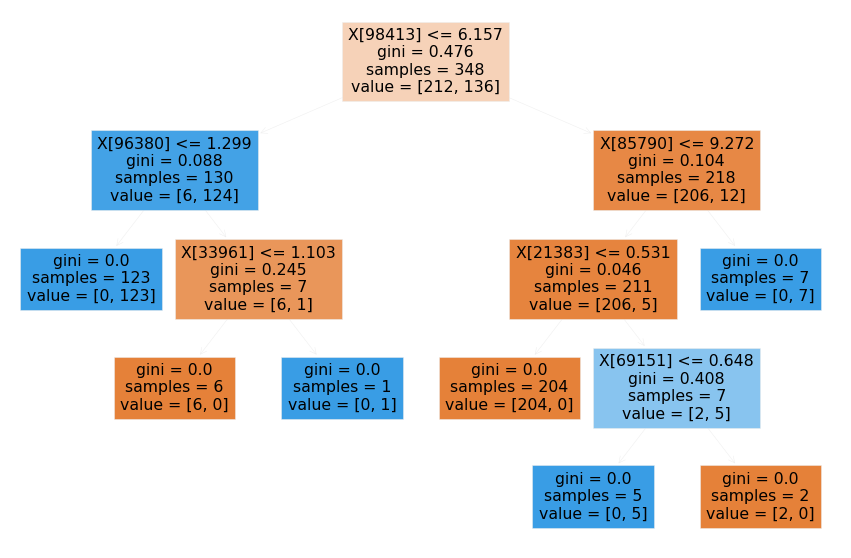

In [55]:
DTPred = plt.figure(figsize=(15,10))
tree.plot_tree(DTClf,filled = 1)

SVM Classifier

In [56]:
SVMClf = svm.SVC(kernel='rbf',random_state=0)
SVMClf.fit(X_train, y_train)
predictSVM = SVMClf.predict(X_test)

print(classification_report(y_test,predictSVM))
Accuracy = (accuracy_score(y_test,predictSVM)*100)
print('ACCURACY of SVM:', round(Accuracy,2),'%')
print("")
print(confusion_matrix(y_test,predictSVM))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.97      1.00      0.99        34

    accuracy                           0.99        87
   macro avg       0.99      0.99      0.99        87
weighted avg       0.99      0.99      0.99        87

ACCURACY of SVM: 98.85 %

[[52  1]
 [ 0 34]]


Gradient Boosting Classifier

In [57]:
GBClf = GradientBoostingClassifier()
GBClf.fit(X_train, y_train)
predictGB = GBClf.predict(X_test)

print(classification_report(y_test,predictGB))
Accuracy = (accuracy_score(y_test,predictGB)*100)
print('ACCURACY of Gradient Boost:', round(Accuracy,2),'%')
print("")
print(confusion_matrix(y_test,predictGB))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        53
           1       1.00      0.85      0.92        34

    accuracy                           0.94        87
   macro avg       0.96      0.93      0.94        87
weighted avg       0.95      0.94      0.94        87

ACCURACY of Gradient Boost: 94.25 %

[[53  0]
 [ 5 29]]


XGBoost Classifier

In [58]:
XGBClf = XGBClassifier()
XGBClf.fit(X_train, y_train)
predictXGB = XGBClf.predict(X_test)

print(classification_report(y_test,predictXGB))
Accuracy = (accuracy_score(y_test,predictXGB)*100)
print('ACCURACY of XGBoost:', round(Accuracy,2),'%')
print("")
print(confusion_matrix(y_test,predictXGB))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       1.00      0.94      0.97        34

    accuracy                           0.98        87
   macro avg       0.98      0.97      0.98        87
weighted avg       0.98      0.98      0.98        87

ACCURACY of XGBoost: 97.7 %

[[53  0]
 [ 2 32]]
